# Generate training and testing sets in Google Colab
(I prepare the training and testing sets through Google Colab since I want to save the GPU in kaggle for model training.)

In [ ]:
# Easiest way to download kaggle data in Google Colab: https://www.kaggle.com/discussions/general/74235

# 1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens
# 2. Click on Create New API Token - It will download kaggle.json file on your machine
# 3. Go to your Google Colab project file and run the following commands

In [1]:
# ! pip install -q kaggle
from google.colab import files
files.upload() # need to choose the file you've downloaded from

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"weichunchang2000","key":"773179abc6899133f0e9962470ce127f"}'}

In [2]:
# make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# change the permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

# list the dataset
! kaggle datasets list

ref                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                  DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36           1220        134  1.0              
muhammadbinimran/housing-price-prediction-data   Housing Price Prediction Data                      763KB  2023-11-21 17:56:32           4736         89  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset   LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1504        115  1.0              
thedrcat/daigt-proper-train-dataset              DAIGT Proper Train Dataset                         119MB  2023-11-05 14:03:25           145

In [3]:
# ! kaggle competitions download -c 'name-of-competition', you will find this in each competition
! kaggle competitions download -c petfinder-pawpularity-score

100% 983M/983M [00:51<00:00, 25.9MB/s]
100% 983M/983M [00:51<00:00, 20.1MB/s]


In [ ]:
! rm -r pawpularitydataset # remove the directory if needed to rerun

! mkdir pawpularitydataset
! unzip petfinder-pawpularity-score.zip -d pawpularitydataset

In [ ]:
! ls pawpularitydataset

sample_submission.csv  test  test.csv  train  train.csv


In [ ]:
! ls pawpularitydataset/train | head -n 10

0007de18844b0dbbb5e1f607da0606e0.jpg
0009c66b9439883ba2750fb825e1d7db.jpg
0013fd999caf9a3efe1352ca1b0d937e.jpg
0018df346ac9c1d8413cfcc888ca8246.jpg
001dc955e10590d3ca4673f034feeef2.jpg
001dd4f6fafb890610b1635f967ea081.jpg
0023b8a3abc93c712edd6120867deb53.jpg
0031d6a9ef7340f898c3e05f92c7bb04.jpg
0042bc5bada6d1cf8951f8f9f0d399fa.jpg
0049cb81313c94fa007286e9039af910.jpg


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import gc # garbage collector for cleaning deleted data from memory

pd.options.display.max_columns = None
pd.options.display.max_rows = None

### We don't deal with the test set since we will submit the notebook for grading and will load the test set then

In [ ]:
train_imgs = [] # just to initialize in case I need to rerun

train_dir = 'pawpularitydataset/train'
train_imgs = ['pawpularitydataset/train/{}'.format(i) for i in os.listdir(train_dir)] # get train images

In [ ]:
train_imgs[:10]

['pawpularitydataset/train/15c681c62392f2ee73ee0087f37ddeaf.jpg',
 'pawpularitydataset/train/4130c0acf816e5b857a7217805da7f13.jpg',
 'pawpularitydataset/train/db26ad9754421faec035456f15269f52.jpg',
 'pawpularitydataset/train/f5f53baf396fee9ee0d51cf0ca5701cf.jpg',
 'pawpularitydataset/train/fc00c2d6b03a78ddd12cde5716c5b0ab.jpg',
 'pawpularitydataset/train/dc978e94fb761b9ee01b0595a2e3b9c8.jpg',
 'pawpularitydataset/train/1c8284661c5c710cd1bd517d5c3e0f63.jpg',
 'pawpularitydataset/train/d3df7802063d5cd7df72a873824015b2.jpg',
 'pawpularitydataset/train/2da1d3fb0dff907c26e11af77f056203.jpg',
 'pawpularitydataset/train/2d589fe856f7487989ac558e65cc213b.jpg']

In [ ]:
len(train_imgs)

9912

In [ ]:
# declare our image dimensions using color images

img_size = 250
channels = 3  # change to 1 if need to use grayscale image

# define function to read and process the images to an acceptable format for our model
train_score = pd.read_csv('pawpularitydataset/train.csv') # the pawpularity score is in this csv file

def read_and_process_image(list_of_images):
    X = [] # an array of resized images
    y = [] # an array of score

    for i, image in enumerate(list_of_images):
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (img_size, img_size), interpolation=cv2.INTER_CUBIC)) # read the image
        y.append(train_score.Pawpularity[i]) # get the score

    return X, y

In [ ]:
# get the whole train and label data
X, y = read_and_process_image(train_imgs)

In [ ]:
len(y)

9912

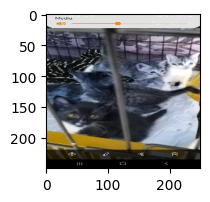

In [ ]:
# randomly check one image and show to check
plt.figure(figsize=(5, 2))
plt.imshow(X[2])

In [ ]:
# convert list to numpy array
X = np.array(X)
y = np.array(y)

# Mount my Google drive to save the processed training arrays and labels
So that I only need to upload the array.npy and label.npy to kaggle to train the model instead of redo data preprocessing everytime.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# save to google drive so that don't need to load the image each time
np.save("/content/drive/MyDrive/Colab Notebooks/group250/training_X.npy", X)
np.save("/content/drive/MyDrive/Colab Notebooks/group250/training_y.npy", y)

# Done preprocessing images into arrays and save in Google drive
Let's switch to the kaggle notebook for model training